In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from specim_test.specim.specfuncs import spec2d
from scipy.ndimage import shift

In [2]:
file_loc = '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/*'

In [3]:
spec2d_file_list_blue = []
spec2d_file_list_red = []
#var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'szfpr' in p:
        sp = fits.open(p)
        hd = sp[0].header
#         fl = int(p[-8:-6])
#         if fl>=42 and fl<48:
        if hd['TARGNAME']=='J2103-0850':
            spec2d_file_list_red.append(p)
    elif 'szfpb' in p:
        sp = fits.open(p)
        hd = sp[0].header
#         fl = int(p[-8:-6])
#         if fl>=42 and fl<48:
        if hd['TARGNAME']=='J2103-0850':
            spec2d_file_list_blue.append(p)

In [4]:
spec2d_file_list_blue, spec2d_file_list_red

(['../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0027r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0021r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0022r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0017r.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0020r.fits'],
 ['../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00019.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00022.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00023.fits',
  '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/n

In [69]:
trim = [825, 975]
specr1 = spec2d.Spec2d(spec2d_file_list_red[0], varext=1, ytrim=trim)
specr2 = spec2d.Spec2d(spec2d_file_list_red[1], varext=1, ytrim=trim)
specr3 = spec2d.Spec2d(spec2d_file_list_red[2], varext=1, ytrim=trim)
specr4 = spec2d.Spec2d(spec2d_file_list_red[3], varext=1, ytrim=trim)
specr5 = spec2d.Spec2d(spec2d_file_list_red[4], varext=1, ytrim=trim)
#spec6 = spec2d.Spec2d(spec2d_file_list[5], varext=1, ytrim=[25, 85])


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00019.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00019.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4128.  yrange: 825:976
Final data dimensions (x y): 4128 x 151

Dispersion axis:              x
N_pixels along dispersion axis: 4128


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00022.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00022.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4128.  yrange: 825:976
Final data dimensions (x y): 4128 x 151

Dispersion axis:              x
N_pixels along dispersion ax

In [48]:
b_trim = [130, 300]
specb1 = spec2d.Spec2d(spec2d_file_list_blue[0], varext=1, ytrim=b_trim)
specb2 = spec2d.Spec2d(spec2d_file_list_blue[1], varext=1, ytrim=b_trim)
specb3 = spec2d.Spec2d(spec2d_file_list_blue[2], varext=1, ytrim=b_trim)
specb4 = spec2d.Spec2d(spec2d_file_list_blue[3], varext=1, ytrim=b_trim)
specb5 = spec2d.Spec2d(spec2d_file_list_blue[4], varext=1, ytrim=b_trim)


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0027r.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0027r.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 130:301
Final data dimensions (x y): 4096 x 171

Dispersion axis:              x
N_pixels along dispersion axis: 4096


Loading file ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0021r.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0021r.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 130:301
Final data dimensions (x y): 4096 x 171

Dispersion axis:              x
N_pixels along dispersion ax

In [19]:
for f in spec2d_file_list_red:
    hd = fits.open(f)[0].header
    print(hd['CD1_1'], hd['CRPIX1'], hd['CRVAL1'], hd['EXPTIME'])

0.8 2000.0 7240.989891 2201
0.8 2000.0 7240.989891 2200
0.8 2000.0 7240.989891 2200
0.8 2000.0 7240.989891 1200
0.8 2000.0 7240.989891 2200


In [40]:
for f in spec2d_file_list_blue:
    fl = fits.open(f, mode='update')
    hd = fl[0].header
    hd['CD1_1'] = 0.61
    print(hd['CD1_1'], hd['CRPIX1'], hd['CRVAL1'], hd['EXPTIME'])
    fl.flush()
    fl.close()

0.61 2048.0 4305.0 1200
0.61 2048.0 4305.0 2200
0.61 2048.0 4305.0 2200
0.61 2048.0 4305.0 2200
0.61 2048.0 4305.0 2200


In [41]:
for f in spec2d_file_list_blue:
    fl = fits.open(f)
    hd = fl[0].header
#     hd['CD1_1'] = 0.61
    print(hd['CD1_1'], hd['CRPIX1'], hd['CRVAL1'], hd['EXPTIME'])
#     fl.flush()
#     fl.close()

0.61 2048.0 4305.0 1200
0.61 2048.0 4305.0 2200
0.61 2048.0 4305.0 2200
0.61 2048.0 4305.0 2200
0.61 2048.0 4305.0 2200


In [54]:
spec2d_file_list_blue

['../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0027r.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0021r.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0022r.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0017r.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpb230716_0020r.fits']

## Coadd blueside data

Profile max value (before normalization) 75.783875


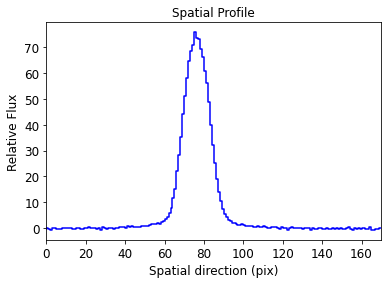


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 70, 80, 3, 4

amplitude=70.000000, x_0=80.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 68, 3, 4

amplitude=40.000000, x_0=68.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.03098759)>

    [1]: <Moffat1D(amplitude=54.20884026, x_0=79.61140364, gamma=15.84736601, alpha=5.68688854)>

    [2]: <Moffat1D(amplitude=43.02637714, x_0=72.86626943, g

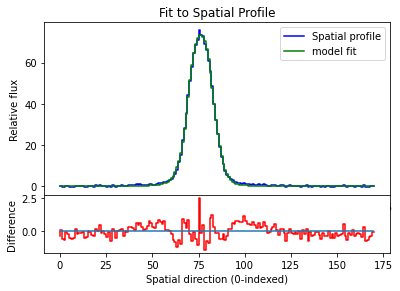

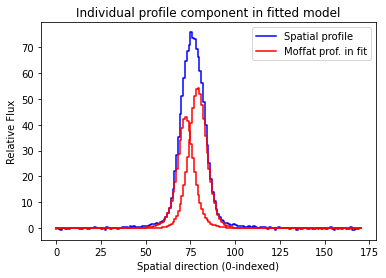


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 229.927765


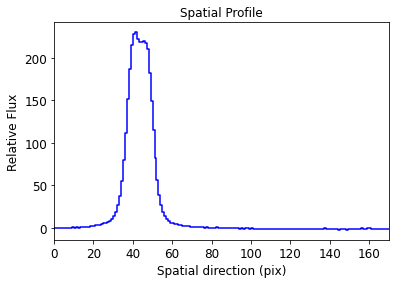


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 210, 48, 3, 4

amplitude=210.000000, x_0=48.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 210, 38, 3, 4

amplitude=210.000000, x_0=38.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.56254451)>

    [1]: <Moffat1D(amplitude=181.60821334, x_0=47.50327899, gamma=6.92852315, alpha=2.51275177)>

    [2]: <Moffat1D(amplitude=195.20737264, x_0=40.68120

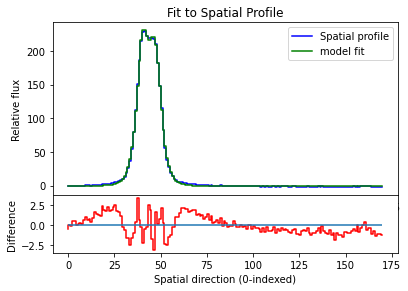

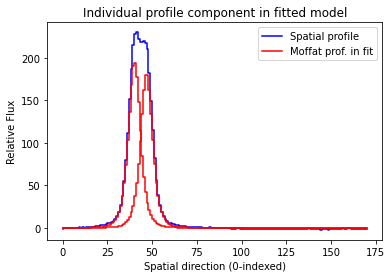


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 144.503662


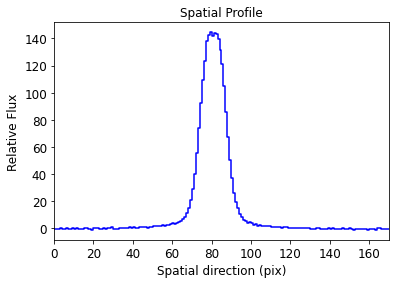


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 140, 86, 3, 4

amplitude=140.000000, x_0=86.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 130, 76, 3, 4

amplitude=130.000000, x_0=76.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.25073677)>

    [1]: <Moffat1D(amplitude=103.94736101, x_0=84.99267253, gamma=7.18128416, alpha=2.15328111)>

    [2]: <Moffat1D(amplitude=112.39120622, x_0=78.139139

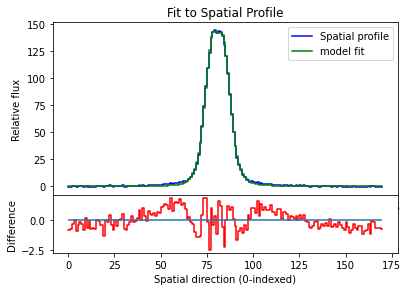

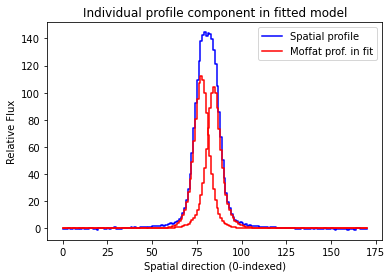


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 244.186523


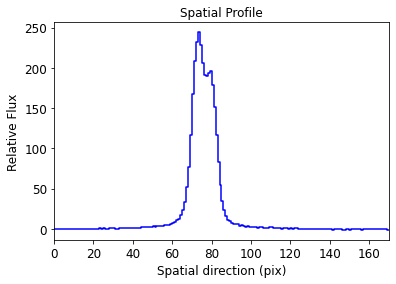


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 190, 81, 3, 4

amplitude=190.000000, x_0=81.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 240, 71, 3, 4

amplitude=240.000000, x_0=71.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.67333701)>

    [1]: <Moffat1D(amplitude=163.70782075, x_0=80.30036378, gamma=6.06481046, alpha=2.51964481)>

    [2]: <Moffat1D(amplitude=222.28153387, x_0=73.421113

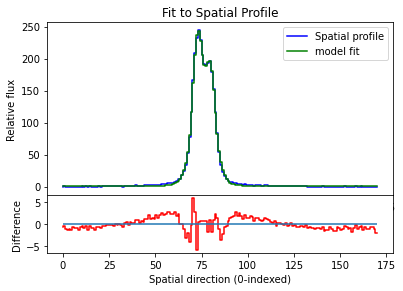

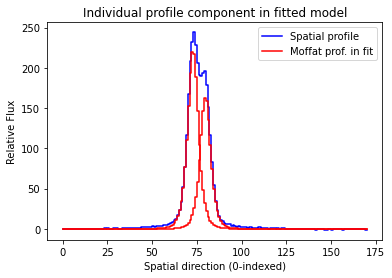


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 263.872986


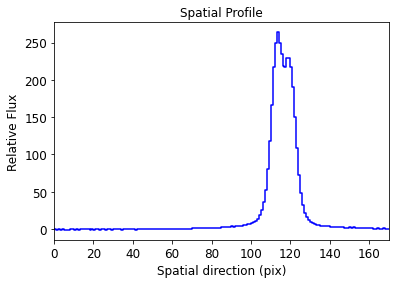


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 210, 120, 3, 4

amplitude=210.000000, x_0=120.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 240, 110, 3, 4

amplitude=240.000000, x_0=110.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.60218845)>

    [1]: <Moffat1D(amplitude=195.90098377, x_0=120.44661982, gamma=6.77251733, alpha=2.86363759)>

    [2]: <Moffat1D(amplitude=236.6417804, x_0=113.5

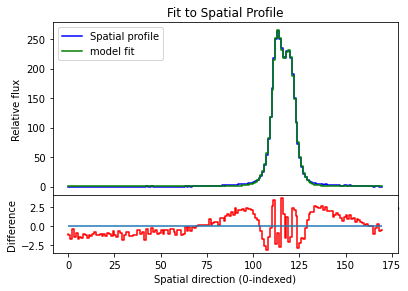

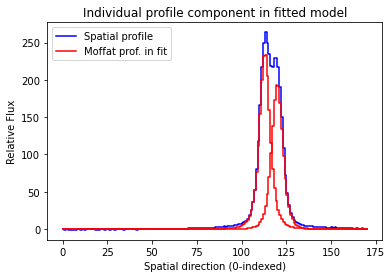


Do you want to start over ? : type yes/no
no


In [51]:
pix_range = [[1700, 2100], [1700, 2100], [1700, 2100], [1700, 2100], [1700, 2100]] 
           # pixrange for order 5 and 6 [2000, 2300], [1700, 2100], 
spec_list = [specb1, specb2, specb3, specb4, specb5]
#order_list = spec1.ordinfo


for i,sp in enumerate(spec_list):
    profile = sp.spatial_profile(pixrange=pix_range[i])
    plt.show()
    sp.initial_model()

In [52]:
for i,sp in enumerate(spec_list):
    if i==0:
        print(sp.mod0.x_0_1.value)
        print(sp.mod0.x_0_2.value)
        cen1 = sp.mod0.x_0_1.value
        cen2 = sp.mod0.x_0_2.value

    else:
        print(cen1 - sp.mod0.x_0_1.value)
        print(cen2 - sp.mod0.x_0_2.value)

79.61140363847444
72.86626942961689
32.10812465278709
32.18506091801925
-5.381268887220941
-5.27286987518211
-0.6889601436460424
-0.5548437895455152
-40.83521618530767
-40.68842126532435


In [56]:
shifted_sp = []
shifted_var = []
shift_pixel = np.array([0.0, 32.14, -5.32, -0.62, -40.76])

for i, sp in enumerate(spec_list):
    #print(sp[order-1].mod0, shift[i])
    nanmask = (sp.vardata <= 0) | (np.isnan(sp.vardata)) 
    nnan = nanmask.sum()
    if nnan > 0:
        print('Found %d NaNs in the two-dimensional variance '\
              'spectrum' % nnan)

        """ Replace the NaNs with a big value """
        sp.vardata[nanmask] = 1.e5
    shifted_sp.append(shift(sp.data, [shift_pixel[i], 0], order=1))
    shifted_var.append(shift(sp.vardata, [shift_pixel[i], 0], order=1))

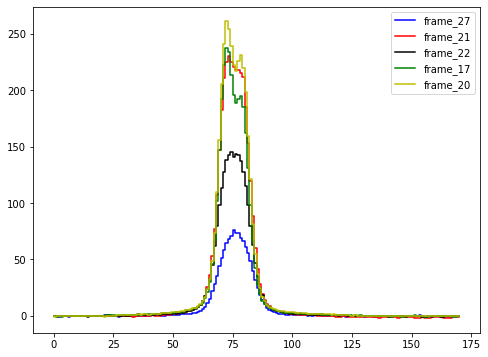

In [57]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g', 'y']
label = ['frame_27','frame_21', 'frame_22', 'frame_17', 'frame_20']
i=0
for p, pix in zip(shifted_sp, pix_range):
    tmpdata = p[:, pix[0]:pix[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1

In [60]:
wtsp = np.zeros(shifted_sp[0].shape)
wtsum = np.zeros(shifted_sp[0].shape)
use_frame = [1, 3, 4]
i = 0
for s, v in zip(shifted_sp, shifted_var):
    if i in use_frame:
        wt = np.zeros(wtsp.shape)
        mask = np.isnan(v) | (v<=0)
        wt[~mask] = 1.0 / v[~mask]
        #print(sum(sum(np.isnan(wt) | (wt<=0))))
        wtsp += wt * s
        #print(sum(sum(wtsp==0)))
        wtsum += wt
    #print(sum(sum(wtsum==0)))
    i +=1

wtsp[wtsum == 0] = 0
wtsum[wtsum == 0] = 1
outsp = wtsp / wtsum
outvar = 1.0 / wtsum

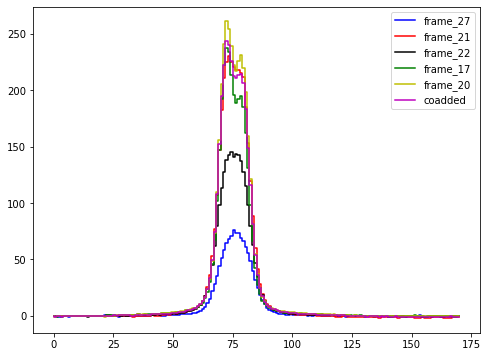

In [61]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g', 'y']
label = ['frame_27','frame_21', 'frame_22', 'frame_17', 'frame_20']
i=0
for p, pix in zip(shifted_sp, pix_range):
    tmpdata = p[:, pix[0]:pix[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1
tmpdata = outsp[:, pix[0]:pix[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

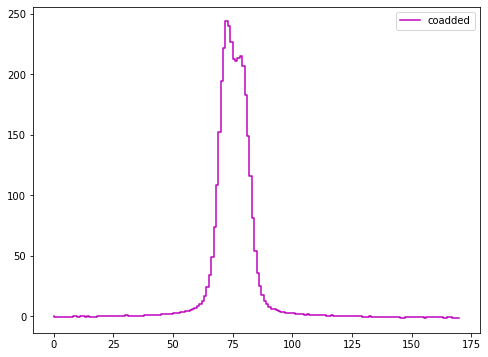

In [62]:
plt.figure(figsize=(8, 6))
tmpdata = outsp[:, pix[0]:pix[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

In [63]:
s = fits.open(spec2d_file_list_blue[1])
file_name1 = 'J2103_LRIS_spectra/J2103_coadd2d_sp'  + '.fits'
file_name2 = 'J2103_LRIS_spectra/J2103_coadd2d_var' + '.fits'
fits.writeto(file_name1, outsp, header=s[0].header)
fits.writeto(file_name2, outvar, header=s[0].header)

## Coadd redside data

In [74]:
spec2d_file_list_red

['../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00019.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00022.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00023.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00028.fits',
 '../galaxy_spectra/LRIS_data/LRIS_data_07_2023/Raw_data_new/night_07162023/spec2d_reduced/szfpr230716_00024.fits']

Profile max value (before normalization) 412.175446


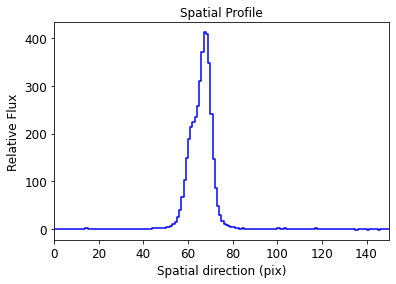


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 400, 68, 3, 4

amplitude=400.000000, x_0=68.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 200, 61, 3, 4

amplitude=200.000000, x_0=61.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.44610784)>

    [1]: <Moffat1D(amplitude=398.37630267, x_0=68.55177511, gamma=6.54084037, alpha=4.02131876)>

    [2]: <Moffat1D(amplitude=189.59460481, x_0=62.212113

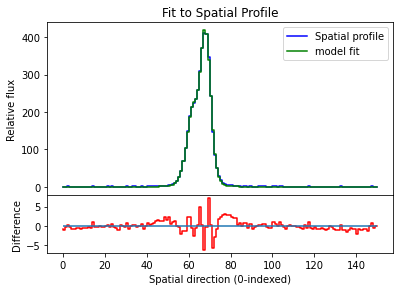

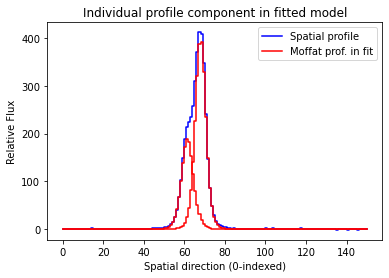


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 405.908569


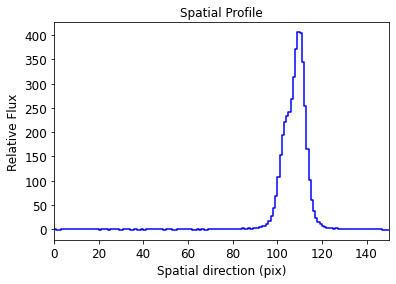


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 400, 112, 3, 4

amplitude=400.000000, x_0=112.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 220, 102, 3, 4

amplitude=220.000000, x_0=102.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.12908922)>

    [1]: <Moffat1D(amplitude=392.80046283, x_0=110.52721189, gamma=6.66102275, alpha=3.6201876)>

    [2]: <Moffat1D(amplitude=188.08444181, x_0=104.0

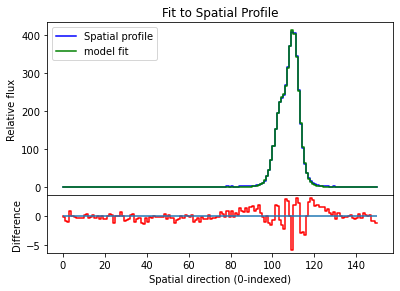

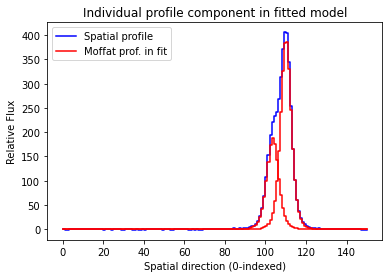


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 351.924438


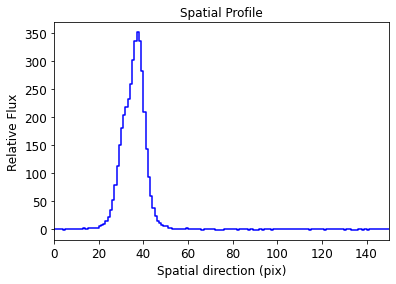


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 340, 39, 3, 4

amplitude=340.000000, x_0=39.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 200, 31, 3, 4

amplitude=200.000000, x_0=31.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.25679708)>

    [1]: <Moffat1D(amplitude=330.27258353, x_0=38.23756515, gamma=6.81879472, alpha=3.22592456)>

    [2]: <Moffat1D(amplitude=157.88035423, x_0=31.780322

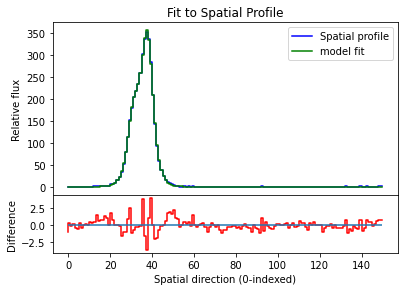

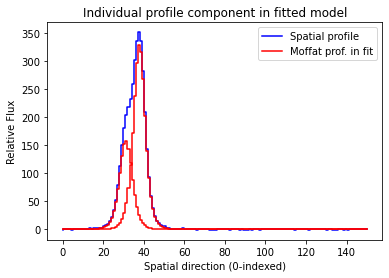


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 105.119110


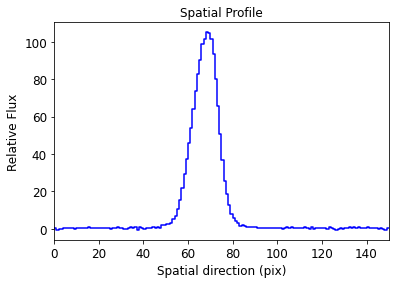


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 100, 70, 3, 4

amplitude=100.000000, x_0=70.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 50, 60, 3, 4

amplitude=50.000000, x_0=60.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.39712184)>

    [1]: <Moffat1D(amplitude=53.25492374, x_0=71.48435673, gamma=8.75895665, alpha=3.44976014)>

    [2]: <Moffat1D(amplitude=73.19377661, x_0=66.37176897, 

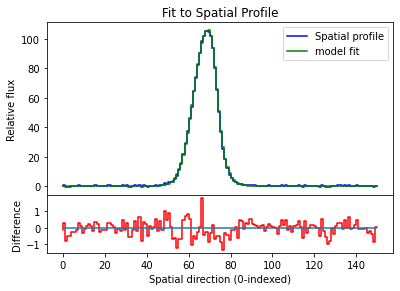

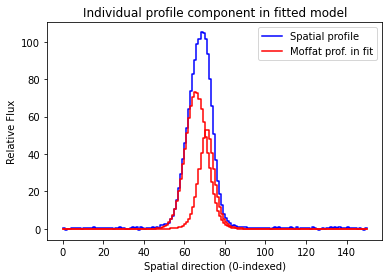


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 206.325531


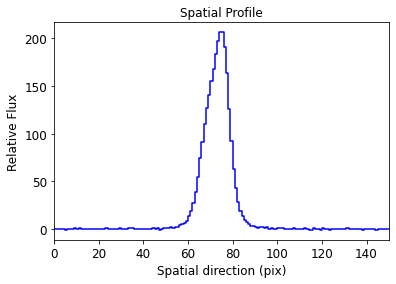


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 200, 77, 3, 4

amplitude=200.000000, x_0=77.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 100, 67, 3, 4

amplitude=100.000000, x_0=67.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.43095276)>

    [1]: <Moffat1D(amplitude=167.97628447, x_0=76.24446348, gamma=7.04764069, alpha=2.82693285)>

    [2]: <Moffat1D(amplitude=109.21554125, x_0=70.111376

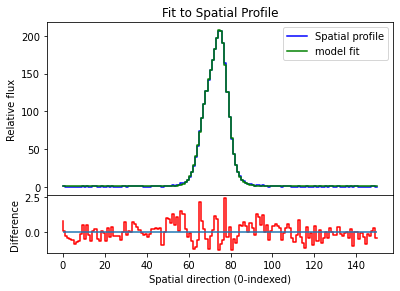

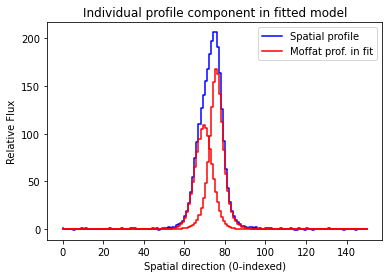


Do you want to start over ? : type yes/no
no


In [71]:
pix_range = [1700, 2100] 
           # pixrange for order 5 and 6 [2000, 2300], [1700, 2100], 
spec_list = [specr1, specr2, specr3, specr4, specr5]
#order_list = spec1.ordinfo

for i,sp in enumerate(spec_list):
    profile = sp.spatial_profile(pixrange=pix_range)
    plt.show()
    sp.initial_model()

In [72]:
for i,sp in enumerate(spec_list):
    if i==0:
        print(sp.mod0.x_0_1.value)
        print(sp.mod0.x_0_2.value)
        cen1 = sp.mod0.x_0_1.value
        cen2 = sp.mod0.x_0_2.value

    else:
        print(cen1 - sp.mod0.x_0_1.value)
        print(cen2 - sp.mod0.x_0_2.value)

68.55177510837018
62.21211393493739
-41.9754367808749
-41.84352724295425
30.314209960033452
30.431791304631716
-2.932581626326524
-4.159655030477666
-7.6926883705365015
-7.899262771089681


In [77]:
shifted_sp = []
shifted_var = []
shift_pixel = np.array([0.0, -41.9, 30.6, -3.0, -7.79])

for i, sp in enumerate(spec_list):
    #print(sp[order-1].mod0, shift[i])
    nanmask = (sp.vardata <= 0) | (np.isnan(sp.vardata)) 
    nnan = nanmask.sum()
    if nnan > 0:
        print('Found %d NaNs in the two-dimensional variance '\
              'spectrum' % nnan)

        """ Replace the NaNs with a big value """
        sp.vardata[nanmask] = 1.e5
    shifted_sp.append(shift(sp.data, [shift_pixel[i], 0], order=1))
    shifted_var.append(shift(sp.vardata, [shift_pixel[i], 0], order=1))

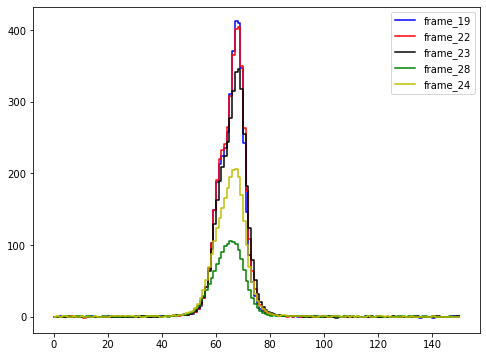

In [78]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g', 'y']
label = ['frame_19','frame_22', 'frame_23', 'frame_28', 'frame_24']
i=0
for p in shifted_sp:
    tmpdata = p[:, pix_range[0]:pix_range[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1

In [79]:
wtsp = np.zeros(shifted_sp[0].shape)
wtsum = np.zeros(shifted_sp[0].shape)
use_frame = [0, 1, 2]
i = 0
for s, v in zip(shifted_sp, shifted_var):
    if i in use_frame:
        wt = np.zeros(wtsp.shape)
        mask = np.isnan(v) | (v<=0)
        wt[~mask] = 1.0 / v[~mask]
        #print(sum(sum(np.isnan(wt) | (wt<=0))))
        wtsp += wt * s
        #print(sum(sum(wtsp==0)))
        wtsum += wt
    #print(sum(sum(wtsum==0)))
    i +=1

wtsp[wtsum == 0] = 0
wtsum[wtsum == 0] = 1
outsp = wtsp / wtsum
outvar = 1.0 / wtsum

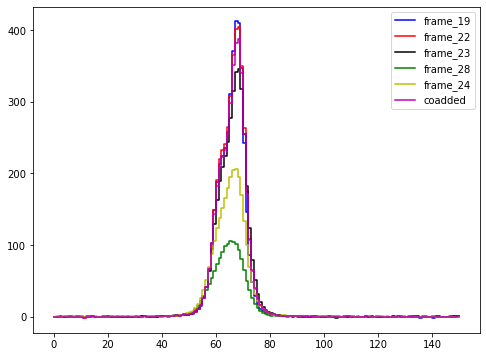

In [83]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k', 'g', 'y']
label = ['frame_19','frame_22', 'frame_23', 'frame_28', 'frame_24']
i=0
for p in shifted_sp:
    tmpdata = p[:, pix_range[0]:pix_range[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()
    i += 1
tmpdata = outsp[:, pix_range[0]:pix_range[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

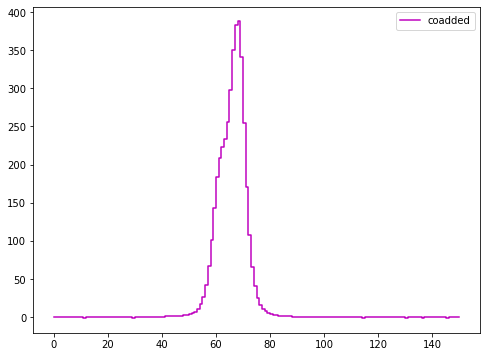

In [84]:
plt.figure(figsize=(8, 6))
tmpdata = outsp[:, pix_range[0]:pix_range[1]]
pflux = np.median(tmpdata, axis=1)
x = np.arange(outsp.shape[0])
plt.plot(x, pflux, color='m', drawstyle='steps', label='coadded')
plt.legend()

In [85]:
s = fits.open(spec2d_file_list_red[1])
file_name1 = 'J2103_LRIS_spectra/J2103_coadd2d_sp_red'  + '.fits'
file_name2 = 'J2103_LRIS_spectra/J2103_coadd2d_var_red' + '.fits'
fits.writeto(file_name1, outsp, header=s[0].header)
fits.writeto(file_name2, outvar, header=s[0].header)